# IMPORT THE PACKAGES AND FILES

In [111]:
# IMPORT NECESSARY PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.core.display import HTML
# List the CSV file 
print (os.listdir("C:/Users/Sultan/Desktop/ML/the-movies-dataset"))

['credits.csv', 'keywords.csv', 'links.csv', 'links_small.csv', 'movies_metadata.csv', 'ratings.csv', 'ratings_small.csv']


In [112]:
# IMPORTING ALL FILES 

path = "C:/Users/Sultan/Desktop/ML/the-movies-dataset/"
credits_dataset = pd.read_csv(path + "credits.csv")
keywords_dataset = pd.read_csv(path + "keywords.csv")
links_dataset = pd.read_csv(path + "links.csv")
links_small_dataset = pd.read_csv(path + "links_small.csv")
movies_metadata_dataset = pd.read_csv(path + "movies_metadata.csv")
ratings_dataset = pd.read_csv(path + "ratings.csv")
ratings_small_dataset = pd.read_csv(path + "ratings_small.csv")

In [113]:
# INITIALIZE ALL THE FILE INTO A LIST

package = [credits_dataset.head(10), keywords_dataset.head(10), links_dataset.head(10), links_small_dataset.head(10),
           movies_metadata_dataset.head(10), ratings_dataset.head(10), ratings_small_dataset.head(10)]

In [114]:
# FROM THE INITIALIZED LIST package, DISPLAY EACH FILES BY USING HTML TABLE TAGS

HTML( '<table><tr style="background-color:white;">' + 
     ''.join(['<td>' + table._repr_html_() + '</td>' for table in package]) +
        '</tr></table>' )

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


# LET'S CLEAN, ANALYSE AND VISUALIZE THE DATASETS 

In [115]:
# TAKE A LOOK OVER THE  movies_metadata_dataset

movies_metadata_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [116]:
# REMOVE THE UNWANTED COLUMNS FROM THE TABLE
movies_metadata_dataset = movies_metadata_dataset.drop(['homepage', 'imdb_id', 'overview', 'popularity', 'poster_path', 
                                                       'runtime', 'status', 'tagline', 'video', 
                                                       'vote_average', 'vote_count', 'original_title', 'belongs_to_collection'], axis=1)

In [117]:
movies_metadata_dataset.head()

,adult,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,title
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II


In [118]:
# THERE ARE SOME ROWS WHICH DOESN'T HAVE THE TITLE NAME (NAN VALUE)
# LET'S REMOVE THOSE ROW 
movies_metadata_dataset[movies_metadata_dataset['title'].isnull() ]

,adult,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,title
19729,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",82663,en,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,False,6.0,1,NaN,NaN,NaN
29502,False,0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",122662,ja,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,False,7.0,12,NaN,NaN,NaN
35586,False,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",249260,en,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,False,4.3,22,NaN,NaN,NaN


In [119]:
movies_metadata_dataset = movies_metadata_dataset[pd.notnull(movies_metadata_dataset['title'])]
# THE NAN TITLE ROW HAS BEEN DELETED FROM THE DATAFRAME

In [120]:
movies_metadata_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 11 columns):
adult                   45460 non-null object
budget                  45460 non-null object
genres                  45460 non-null object
id                      45460 non-null object
original_language       45449 non-null object
production_companies    45460 non-null object
production_countries    45460 non-null object
release_date            45376 non-null object
revenue                 45460 non-null float64
spoken_languages        45460 non-null object
title                   45460 non-null object
dtypes: float64(1), object(10)
memory usage: 4.2+ MB


In [121]:
# CHANGE THE ADULTS VALUE TO BOOLEAN AND RELEASE_DATA INTO DATE OBJECT

movies_metadata_dataset['adult'].unique()
movies_metadata_dataset['adult'] = movies_metadata_dataset['adult'].map({'True': True, 'False': False})

movies_metadata_dataset['release_date'] = pd.to_datetime(movies_metadata_dataset['release_date'], format = '%Y-%m-%d', errors='coerce')

In [122]:
# COUNT THE NUMBER OF TRUE AND FALSE

movies_metadata_dataset['adult'].value_counts()

False    45451
True         9
Name: adult, dtype: int64

In [123]:
# SHOW THE DATATYPE OF THE release_data COLUMN

movies_metadata_dataset['release_date'].dtype

dtype('<M8[ns]')

In [124]:
movies_metadata_dataset.head()

,adult,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,title
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II


In [125]:
# SINCE THESE FEATURES genres, production_countries, belongs_to_collection and spoken_languages ARE IN DICTIONARY FORMAT
# LET'S CONVERT THOSE INTO A LIST AND REMOVE UNWANTED DATA FROM THE DICTIONARY

def genresToList(data):
    
    data = data.strip('][').replace('{', "").replace('}', "").split(',')
    li = []
    for i in data:
        i = i.split(':')
        if i[0].strip(' ') == '\'name\'':
            li.append(i[1].strip(' ').strip('\''))
    return None if len(li)==0 else li      


In [126]:
movies_metadata_dataset['genres'] = movies_metadata_dataset['genres'].map(lambda x: genresToList(x))
movies_metadata_dataset['production_companies'] = movies_metadata_dataset['production_companies'].map(lambda x: genresToList(x))
movies_metadata_dataset['production_countries'] = movies_metadata_dataset['production_countries'].map(lambda x: genresToList(x))
movies_metadata_dataset['spoken_languages'] = movies_metadata_dataset['spoken_languages'].map(lambda x: genresToList(x))

In [127]:
movies_metadata_dataset.head()

,adult,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,title
0,False,30000000,"[Animation, Comedy, Family]",862,en,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,[English],Toy Story
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,"[English, Français]",Jumanji
2,False,0,"[Romance, Comedy]",15602,en,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,[English],Grumpier Old Men
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,[English],Waiting to Exhale
4,False,0,[Comedy],11862,en,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,[English],Father of the Bride Part II


In [128]:
movies_metadata_dataset['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [129]:
# let's find the range of release date
movies_metadata_dataset['release_date'].describe() # It's a range between 09-12-1874 to 16-12-2020 


count                   45376
unique                  17333
top       2008-01-01 00:00:00
freq                      136
first     1874-12-09 00:00:00
last      2020-12-16 00:00:00
Name: release_date, dtype: object

In [130]:
movies_metadata_dataset = movies_metadata_dataset[pd.notnull(movies_metadata_dataset['release_date'])]
# drop the row which has no release date

In [131]:
# Let's visualize the number of movies has been released in each year
years = list(movies_metadata_dataset['release_date'].apply(lambda x: int(x.year))) 
uyear = list(set(years))
yearMovieCount = [years.count(yr) for yr in uyear]
yearMovieCount

[1,
 1,
 1,
 1,
 2,
 5,
 6,
 3,
 1,
 13,
 7,
 14,
 8,
 13,
 5,
 14,
 10,
 2,
 18,
 8,
 5,
 7,
 7,
 6,
 10,
 7,
 6,
 14,
 13,
 19,
 29,
 32,
 17,
 16,
 23,
 29,
 34,
 34,
 23,
 39,
 40,
 50,
 41,
 66,
 76,
 81,
 100,
 136,
 147,
 141,
 144,
 152,
 155,
 127,
 134,
 152,
 147,
 146,
 145,
 142,
 147,
 128,
 156,
 157,
 174,
 184,
 196,
 194,
 200,
 191,
 209,
 218,
 244,
 220,
 224,
 218,
 203,
 229,
 233,
 254,
 247,
 306,
 289,
 338,
 305,
 351,
 378,
 381,
 356,
 348,
 332,
 333,
 334,
 321,
 338,
 361,
 360,
 368,
 353,
 362,
 368,
 391,
 462,
 467,
 439,
 427,
 426,
 453,
 489,
 544,
 599,
 633,
 661,
 722,
 723,
 789,
 865,
 905,
 882,
 992,
 1125,
 1270,
 1320,
 1473,
 1586,
 1501,
 1667,
 1722,
 1889,
 1974,
 1905,
 1604,
 532,
 5,
 1]

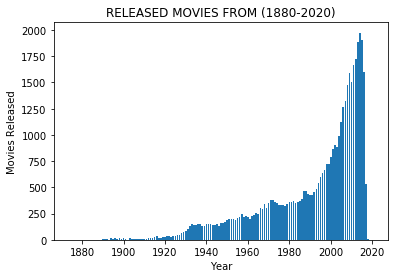

In [132]:
# let's consider uyear as x-axis and yearMovieCount as y-axis
plt.bar(uyear, yearMovieCount)
plt.xlabel("Year")
plt.ylabel("Movies Released")
plt.title("RELEASED MOVIES FROM (1880-2020)")
plt.show()

In [133]:
# let's Visualize the Top 10 Movies which has high revenue
movies_metadata_dataset = movies_metadata_dataset.sort_values('revenue', ascending=False)
title, rev = list(movies_metadata_dataset['title'].head(10)), list(movies_metadata_dataset['revenue'].head(10))
print("TITLE: ", title)
print()
print("REVENUE: ", rev)

TITLE:  ['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers', 'Jurassic World', 'Furious 7', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'Beauty and the Beast']

REVENUE:  [2787965087.0, 2068223624.0, 1845034188.0, 1519557910.0, 1513528810.0, 1506249360.0, 1405403694.0, 1342000000.0, 1274219009.0, 1262886337.0]


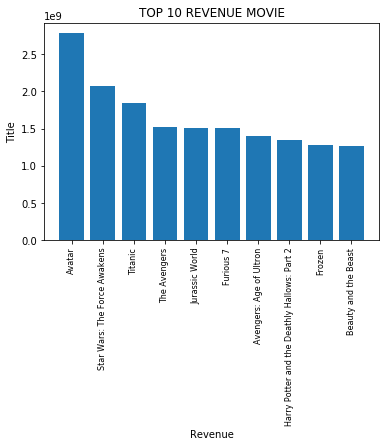

In [134]:
plt.bar(title, rev)
plt.xlabel('Revenue')
plt.ylabel('Title')
plt.title("TOP 10 REVENUE MOVIE")
plt.xticks(title, fontsize=8, rotation=90)
plt.show()

In [135]:
# let's list and visualize the number of genre and respective movie count
total_genres = []
movies_metadata_dataset['genres'].map(lambda x : [total_genres.append(i) for i in x ] if x != None else None)
genre = list(set(total_genres))
print("GENRES: ", genre)
genre_count = [total_genres.count(i) for i in genre]
print()
print("GENRE COUNT: ", genre_count)

GENRES:  ['Romance', 'Drama', 'Fantasy', 'TV Movie', 'Western', 'Animation', 'Documentary', 'War', 'Thriller', 'Comedy', 'Action', 'Mystery', 'Science Fiction', 'Adventure', 'Music', 'History', 'Family', 'Horror', 'Foreign', 'Crime']

GENRE COUNT:  [6733, 20255, 2313, 766, 1042, 1932, 3921, 1323, 7619, 13181, 6592, 2464, 3042, 3494, 1598, 1397, 2768, 4670, 1621, 4305]


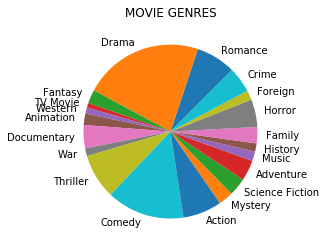

In [136]:
# let's implement a pie char
plt.pie(genre_count, labels=genre, startangle=45)
plt.title("MOVIE GENRES")
plt.show()

# MOVIE RECOMMENDATION USING COLLABORATIVE FILTERNG

In [137]:
# To implement movie recommendation using collaborative filtering
# we need user and their rating
# let's make use of rating_dataset

ratings_small_dataset.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [138]:
# we need only userId, movieId and rating features
# let's drop other feature

ratings_small_dataset = ratings_small_dataset.drop(['timestamp'], axis=1)

In [139]:
ratings_small_dataset = ratings_small_dataset.rename(columns={'movieId':'id'}) 
ratings_small_dataset.head()

,userId,id,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [140]:
ratings_small_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
userId    100004 non-null int64
id        100004 non-null int64
rating    100004 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [141]:
ratings_small_dataset.shape

(100004, 3)

In [144]:
user_ratings = ratings_small_dataset.pivot_table(index=['userId'], columns=['id'], values='rating')
user_ratings.head()

id,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# let's remove the movieId which has less than 10 users who rated it
# fill the remaining NaN with 0
user_ratings = user_ratings.dropna(thresh=10, axis=1).fillna(0)
user_ratings.head()

id,1,2,3,4,5,6,7,9,10,11,...,119145,122882,122886,122892,122900,122904,134130,134853,139385,148626
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Let's build similarity matrix using pearson correlation
similarity_item = user_ratings.corr(method='pearson')
similarity_item.head()

id,1,2,3,4,5,6,7,9,10,11,...,119145,122882,122886,122892,122900,122904,134130,134853,139385,148626
id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.223742,0.183266,0.071055,0.105076,0.201503,0.156075,0.023699,0.089163,0.168445,...,0.087790,0.100162,0.086723,0.089341,0.095922,0.023192,0.023458,0.080114,0.091621,0.043354
2,0.223742,1.000000,0.123790,0.125014,0.193144,0.085889,0.117211,0.053810,0.306685,0.186660,...,-0.007617,-0.013938,0.027126,0.052120,0.048792,-0.023650,0.007484,-0.030651,0.000362,0.021187
3,0.183266,0.123790,1.000000,0.147771,0.317911,0.158071,0.390331,0.274638,0.086065,0.139719,...,-0.007911,-0.042154,-0.035001,-0.014423,-0.018837,-0.041985,-0.032418,-0.054182,-0.021995,-0.034863
4,0.071055,0.125014,0.147771,1.000000,0.150562,0.024466,0.156876,0.238193,0.063511,0.116366,...,-0.017473,-0.027167,-0.026232,-0.018171,-0.020553,-0.019858,-0.025320,-0.024494,-0.017574,-0.015760
5,0.105076,0.193144,0.317911,0.150562,1.000000,0.186936,0.339605,0.339402,0.150292,0.220251,...,0.012751,-0.033670,-0.002217,0.025343,0.016481,0.008837,-0.000408,-0.044739,0.009410,0.020957


In [186]:
# let's test the similarity matrix
# for movie id 1

rec = similarity_item[1].sort_values(ascending=False).head(7)

# no need to consider movie id 1 to movie id 1  
#the higher correlation is at top
rec

id
1       1.000000
3114    0.474141
2355    0.393799
1265    0.372371
4886    0.366277
780     0.356876
6377    0.348941
Name: 1, dtype: float64